This example shows how dummy cores will expand into new cores in the output.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


In [2]:
from rdkit.Chem import PandasTools

In [3]:
PandasTools.molRepresentation = "svg"

In [4]:
import pandas as pd
from rdkit.Chem import PandasTools

In [5]:
core = Chem.MolFromSmarts("*1****1-*2***2")

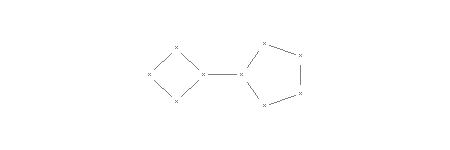

In [6]:
core

In [7]:
smiles = ["C1CCCC1-C2CCC2Cl", "N1CCCC1-C2CCC2Cl", "O1CCCC1-C2CCC2Cl", "N1OCCC1-C2CCC2Cl", "N1OCSC1-C2CCC2Cl"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

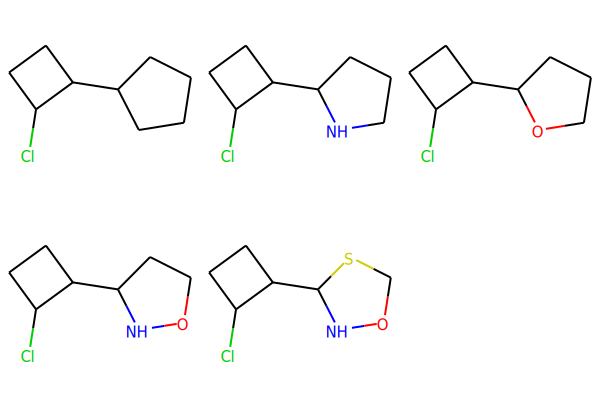

In [8]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

In [9]:
core.GetSubstructMatch(core)

(0, 1, 2, 3, 4, 5, 6, 7, 8)

Make RGroup decomposition!

In [10]:
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)

In [11]:
for i,m in enumerate(mols):
    rgroups.Add(m)
    if i == 10:
        break

We need to call process after all molecules are added.  To optimize the RGroups.

In [12]:
rgroups.Process()

True

In [13]:
groups = rgroups.GetRGroupsAsColumns()
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)

The first two (0 and 1) are different due to the sterochemistry difference.
I still haven't found a way to show the core with stereochem which is annoying.

In [14]:
frame

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2017.09.1.dev1
	BOOST: 1_58


RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2017.09.1.dev1
	BOOST: 1_58
